<a href="https://colab.research.google.com/github/SeidaAhmed/Finacial_html_data_capture_NLTK/blob/main/CRWD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
metrics_8k=[
"https://www.sec.gov/Archives/edgar/data/1535527/000153552725000005/crwd-20250304xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552724000024/crwd-20241126xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552724000017/crwd-20240828xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552724000011/crwd-20240604xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552724000004/crwd-20240305xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552723000024/crwd-20231128xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552723000018/crwd-20230830xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552723000012/crwd-20230531xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552723000006/crwd-20230307xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552722000023/crwd-20221031xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552722000016/crwd-20220731xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552722000010/crwd-20220430xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552722000004/crwd-20220309xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552721000026/crwd-20211201xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552721000017/crwd-20210831xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552721000011/crwd-20210603xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552721000005/crwd-20210316xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552720000023/crwd-20201202xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552720000017/crwd-20200902xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552720000010/crwd-20200602xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552720000004/crwd-20200319xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000153552719000007/crwd-20191205xex991.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000155837019008509/ex-99d1.htm",
"https://www.sec.gov/Archives/edgar/data/1535527/000155837019006148/ex-99d1.htm"
]


#metrics_8k=['https://www.sec.gov/Archives/edgar/data/1535527/000153552724000004/crwd-20240305xex991.htm']
#Annual Recurring Revenue (ARR)
#gross retention
# Next-Gen SIEM, Cloud Security, and Identity Protection businessesARR
#total subscription customers
#rowdStrike’s subscription customers that have adopted four or more modules, five or more modules and six or more modules increased to 64%, 50%, and 27%, respectively, as of April 30, 2021.
#                                    Must capture--> four modules 64 %,   five: 50% six 27%




Important imports

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import requests
from bs4 import BeautifulSoup
try:
    import urllib.request as urllib3
    #requests.packages.urllib3.contrib.pyopenssl.extract_from_urllib3()
except ImportError:
    import urllib3
import zlib
from nltk import Tree
import re
nltk.download('maxent_treebank_pos_tagger')
nltk.download('path')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

years = []
for i in range(2000,2100):
  years.append(i)
unit_conv={"billion":1000000000, "million":1000000,"millions":1000000,"thousand":1000,"%":0.01,"percentage":0.01,"percent":0.01,"":1,"basis points":0.0001,"bps":0.0001}


[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Error loading path: Package 'path' not found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Functions that should generally stay the same:

In [3]:
def extract_soup(url):

    hdr = {'User-Agent': 'UbineerCorp info@ubineer.com','Accept-Encoding': 'gzip, deflate','host': 'www.sec.gov'}
    s = requests.Session()
    s.headers.update(hdr)
    data = s.get(url)
    s.close()
    soup = BeautifulSoup(data.content, features="html.parser")
    return(soup)

def openBS(html_file):

  with open(html_file, encoding = "ISO-8859-1") as fp:

    soup = BeautifulSoup(fp,'html.parser')

  return soup

def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

def find_between_include(s, first, last, length):
    try:
        start = s.index( first ) - length
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


def unitConversion(insert_lst):
  value = None
  insert_lst[0] = insert_lst[0].replace('flat','0%')
  unit_conv={"billion":1000000000,"million":1000000,"thousand":1000,"%":0.01,"percentage":0.01,"percent":0.01,"":1,"basis points":0.0001,"bps":0.0001}
  if len(insert_lst) != 2:

    for unit in list(unit_conv.keys()):
      if unit == '':
        pass
      elif unit in insert_lst[0]:
        insert_lst = [str(insert_lst[0]).replace(unit,''), unit]



  insert_lst[-1] =insert_lst[-1].lower()


  insert_lst[0] = str(insert_lst[0]).replace(',','').replace('$','').replace('(','-').replace(')','').replace('%','').strip()
  #Andi adds brackets


  insert_lst[0] = float(insert_lst[0])

  for ele in unit_conv.keys():
    #print(ele)
    if ele == insert_lst[-1]:
      value = insert_lst[0] * unit_conv[ele]
      #attempt to fix floating point error
      value = round(value,4)
    else:
      pass
  if value == None:
    print("Value is None: ", insert_lst)
  return value

def change_pos_tag(tag_sentence,model):
    new_tag_lst=[]
    for ele in tag_sentence:
        if ele[0] in model.keys():
            new_tag_lst.append((ele[0],model[ele[0]]))
        else:
            new_tag_lst.append(ele)
    return(new_tag_lst)

def listofdict (tree):
  # source: https://stackoverflow.com/questions/63945863/converting-nltk-chunks-to-a-list-of-dictionaries
  # need helper function to simply put chunks into dictionaries
    dlist = []
    d = {}
    for item in tree:

        if isinstance(item, Tree):

            d[item.label()] = ' '.join([l[0] for l in item.leaves()])
            dlist.append(d) if len(d)>0 else None
            d = dict()

    dlist.append(d) if len(d)>0 else None
    return dlist

def find_segment(listofdict):
    # helper function
    tl = "Timeline"
    tl_count = 0
    segment = 0
    for i in range(len(listofdict)):
        if tl in listofdict[i].keys():
            tl_count +=1
            if tl_count == 2:
                segment = i
                return segment
    return len(listofdict)

def combine_dict(listofdict):
  # merge messy dictionaries from stack overflow function
    master_outlook = []

    while(len(listofdict) > 0 ):
        segment = find_segment(listofdict)

        time_dict = {}
        for i in range(segment):
            time_dict.update(listofdict[i])

        listofdict = listofdict[segment:]
        master_outlook.append(time_dict)
    return master_outlook

Capture guidance function: This function captures all the text in the guidance section of the html file. It should generally stay the same unless the company has a weird format or you need to change out some specific words.

In [4]:
def captureGuidance(eightK_lst):
    guidance_bs4_lst=[]
    for ele in eightK_lst:

        bs4_8K=extract_soup(ele)
        #print(bs4_8K.prettify())
        test= bs4_8K.get_text()
        #print(len(test))
        result = find_between( test,"CrowdStrike Reports" , "Financial Outlook" )
        print(result)
        # if not result: # some companies call outlook guidance
        #   result = find_between( test, "Guidance", "Call")
        # elif not result: # pltr is inbetween outlook and earnings webcast
        #   result = find_between( test, "Outlook", "Earnings")


        #print(bs4_8K.select(test.name+':contains("Financial Outlook")'))
        #print(result)
        #print(bs4_8K.find(text="Quarterly Conference Call ").previous_element.parent)

        result = re.sub(r'(\d+)-(\d+)', r'\1 \2', result)
        result = re.sub(r'(\$\d+\.\d+)', r'\1 ', result)
        result = re.sub(r'\b(low|mid|high|single|teens|to)-\b', r'\1 ', result)

        replace = {'%':' % ','shares':' shares ','.For':' for','outstandingfull':' outstanding full ','20232exhibit':'2023 ','year over year':'year-over-year','millionfor':' million for ','\n':' ','half':'0.5',
                '•': ' ','\xa028':' ','\xa017':' ','    ':'','◦':' ','million.':' million . ', '\xa0':' ','%.': ' % .','\uf0b7':' ','oRevenue':'revenue','oNon-GAAP':'non-gaap','●':' ','.Non-GAAP':'. non-gaap','.Revenues':'. revenues','breakeven':'$0', 'four or more':'four_more','five or more':'five_more', 'eight or more':'eight_more', 'six or more':'six_more', 'seven or more':'seven_more','CrowdStrike’s':'crowdStrike','.Recent':' ','.recent':' ','.full':' ','.Full':' '}
        for word in replace:
          result = result.replace(word,replace[word])
        guidance_bs4_lst.append(result.strip().lower())
    return guidance_bs4_lst

metrics_data = captureGuidance(metrics_8k)
metrics_data


 Fourth Quarter and Fiscal Year 2025 Financial Results•Ending ARR grows 23% year-over-year to reach $4.24 billion, adding $224 million in net new ARR in Q4•Achieves full year subscription revenue of $3.76 billion, growing 31% year-over-year •Delivers record full year operating cash flow of $1.38 billion and record full year free cash flow of $1.07 billionAUSTIN, Texas - March 4, 2025 -- CrowdStrike Holdings, Inc. (Nasdaq: CRWD), today announced financial results for the fourth quarter and fiscal year 2025, ended January 31, 2025."Delivering $224 million of net new ARR, which brings our ending ARR to $4.24 billion, places us firmly on the flight path to our $10 billion ending ARR goal,” said George Kurtz, CrowdStrike’s Founder and CEO. “As businesses of all sizes rapidly adopt AI, stopping the breach necessitates cybersecurity’s AI-native platform. We are seeing strong momentum in our Next-Gen SIEM, Cloud Security, and Identity Protection businesses, surpassing $1.3 billion in combined 

['fourth quarter and fiscal year 2025 financial results ending arr grows 23 %  year-over-year to reach $4.24  billion, adding $224 million in net new arr in q4 achieves full year subscription revenue of $3.76  billion, growing 31 %  year-over-year  delivers record full year operating cash flow of $1.38  billion and record full year free cash flow of $1.07  billionaustin, texas - march 4, 2025 -- crowdstrike holdings, inc. (nasdaq: crwd), today announced financial results for the fourth quarter and fiscal year 2025, ended january 31, 2025."delivering $224 million of net new arr, which brings our ending arr to $4.24  billion, places us firmly on the flight path to our $10 billion ending arr goal,” said george kurtz, crowdstrike founder and ceo. “as businesses of all sizes rapidly adopt ai, stopping the breach necessitates cybersecurity’s ai-native platform. we are seeing strong momentum in our next-gen siem, cloud security, and identity protection businesses, surpassing $1.3  billion in 

These are the custom chunking model words. This will vary depending on the company, but the core words will stay in here.

Filter sentence function: Will need to change the stop words depending on the context.

In [5]:

model = {'first': 'CD', 'second': 'CD', 'third': 'CD', 'fourth': 'CD', 'total': 'total', 'expected': 'expected', 'quarter': 'TIME', 'year': 'TIME', 'breakeven': 'CD', 'full':
'CD', 'tax': 'tax', 'subscription': 'sub', 'billings': 'bill', 'billion': 'unit', 'revenue': 'rev', 'unit': 'unit', 'full-year': 'TIME', 'fiscal': 'TIME', 'million': 'unit',
'share': 'share', 'shares': 'share', 'year-over-year': 'yoy', '%': '%', 'ebitda': 'ebitda', 'loss': 'loss', 'arr': 'arr', 'income': 'income', 'net': 'net', 'revenues': 'rev',
'non-gaap': 'non-gaap', 'gaap': 'gaap', 'operating': 'op', 'margin': 'mar', 'services': 'ser', 'adjusted': 'adj', 'negative': 'negative', 'respectively': 'resp', 'basic': 'basic',
'q1': 'TIME', 'q2': 'TIME', 'q3': 'TIME', 'q4': 'TIME', 'fy': 'TIME', 'expenses': 'expenses', 'quarter-over-quarter': 'qoq', 'expectation ': 'expect', 'gross': 'gross', 'growth': 'growth',
'rate': 'rate', 'operations': 'op', 'operation': 'op', 'cash': 'cash', 'expenditures': 'expenses', 'provision': 'prov', 'thousand': 'unit', 'earning': 'earn', 'taxes': 'tax', 'expense': 'expenses',
'interest': 'interest', 'subscriptions': 'sub', 'eps': 'eps', 'compensation': 'comp', 'amortization': 'amort', 'acquisition': 'acq', 'costs': 'cost', 'debt': 'debt', 'assumed': 'ass', 'common': 'com',
'dec.': 'month', 'break-even': 'CD', 'free': 'free', 'flow': 'flow', 'annual': 'ann', 'cloud': 'cloud', 'positive': 'pos', 'zero': 'CD', 'comparable': 'comp', 'comp': 'comp', 'return': 'rtn', 'invested': 'inv',
'capital': 'cap', 'dividend': 'div', 'payments': 'pay', 'target': 'target', 'consolidated': 'con','percent':'%', 'customers':'cust', 'customer':'cust','retention':'ret','modules':'mod', 'adopted':'adop',
'repurchases': 'repur', 'repurchase': 'repur','repurchased': 'repur', 'repayments': 'repay', 'maturities': 'matur', 'reduced': 'reduce', 'reducing': 'reduce', 'planned': 'plan', 'percent': '%', 'investments': 'inv',
'profit': 'profit', 'low-teens': 'CD', 'fromsource': 'src', 'organic': 'organic', 'expansion': 'growth', 'bps': 'bps', 'increase': 'growth', 'half': 'CD', 'back': 'CD', 'ending': 'ending', 'ended': 'end', 'count': 'count',
'even': 'CD', 'single': '%', 'percentage': '%', 'low': 'CD', 'mid': 'CD', 'high': 'CD', 'flat': 'CD', 'teens': '%', 'margins': 'mar', 'core': 'core', 'non-u.s.': 'non-gaap', 'outlook': 'outlook', 'â€”': ':', 'homes': 'home',
'closed': 'closed', 'end': 'end', 'lower': 'reduce', 'sg': 'sg', 'pre-tax': 'pre-tax','increased':'growth' ,'increasing': 'growth', 'financial': 'financial', 'roic': 'roic', 'basis': 'basis', 'points': 'points', 'sales': 'sales', 'period': 'period','crowdStrike':'crowdStrike',
 'double-digit': 'CD', 'saas': 'saas', 'license': 'license', 'attributable': 'att', 'stockholders':  'stkhdr', 'hardware': 'hardware', 'reduce': 'reduce', 'stock': 'stk', 'restoration': 'restoration', 'continuing': 'continuing',
 'intangibles': 'intan', 'non-cash': 'non-cash', 'stock-based': 'stk', 'service': 'ser', 'expectations': 'expect', 'aggregates': 'aggr', 'freight-adjusted': 'frtadj', 'price': 'price','surpassing':'growth', 'eclipsing':'growth','security':'sec',
'digit': '%', 'asphalt': 'asphalt', 'concrete': 'concrete', 'calcium': 'calcium', 'sag': 'sag', 'depreciation': 'dpr', 'depletion': 'dpl', 'accretion': 'accr', 'shipment': 'spmt', 'cost': 'cost','protection':'prot', 'identity':'id',
'down': 'negative', 'up': 'pos', 'volume': 'vol', 'tons': 'tons', 'spending': 'spend', 'pricing': 'price', 'non-aggregates': 'non-aggr', 'improvement': 'growth', 'improve': 'growth', 'diluted': 'dil', 'earnings': 'earn','dollars':'$',
'foreign':'foreign','grew':'growth' ,'module':'mod', 'grow':'growth','rates':'rate','adoption':'adop' ,'finance':'fin','currency':'currency','expect':'expect','marketable':'marketable','securities':'securities','headcount':'headcount', 'ARR' : 'ARR','logscale':'logscale','next-gen':'next-gen','siem':'siem','solutions':'sol'}

model.update({'january': 'month', 'february': 'month', 'march': 'month', 'april': 'month', 'may': 'month', 'june': 'month','july': 'month', 'august': 'month', 'september': 'month', 'october': 'month', 'november': 'month', 'december': 'month'})
#meta specific
model.update({'ad':'ad','dap':'dap','daus':'daus','map':'map','maus':'maus','impressions':'impr','four_more':'fourmore' ,'five_more':'fivemore', 'eight_more':'eightmore', 'six_more':'sixmore','seven_more':'sevenmore','crowdStrike':'crowdStrike'})

In [6]:
def filter_sent(sentence, model):
    custom_stop = ["approximately","/", ',','information','available',"'s",'follows',':','range','outstanding','respectively','average','basic','weighted-average','representing','weighted','ending','roughly','~','assuming', 'including', 'principal','payments','leases','projected']
    stop_words = set(stopwords.words("english"))
    filtered_sentence = []
    for w in sentence:
        if (w not in stop_words and w not in custom_stop) or (w in model.keys()):
            filtered_sentence.append(w)
    return filtered_sentence

Chunking function: This is the most difficult function to write. Completely depends on the way the company writes their sentences. When writing this function it's best to print(tagged) to see what's being shown. During this stage changes may need to be made to the model and custom stop words, as well as the captureGuidance function.

In [7]:
def metrics_CHUNK(sentence, model):

    tagged_raw = nltk.pos_tag(sentence)

    tagged = change_pos_tag(tagged_raw,model) #https://www.guru99.com/pos-tagging-chunking-nltk.html
    print(tagged)
    chunk_rev = r"""

 Timeline:{<CD><TIME><TIME><CD>}<finacial><NNS>
    Timeline:{<month><CD><CD>}




    Annual_Rec_Rev_ARR:<growth><CD><\%><yoy><growth>?<\$>{<CD><unit>}
    gross_ret: {<CD><\%>}<gross><ret>

    total_subs_customers: <total>{<CD>}<sub><cust>

    eight_modules adoption rate:<mod><adop>?<rate>?<growth>?<CD><\%><CD><\%><CD><\%>{<CD><\%>}<fivemore><sixmore><sevenmore><eightmore><mod><resp>


    seven_modules adoption rate:<rate><growth>?<CD><\%><CD><\%>{<CD><\%>}
    six_modules adoption rate:<rate><growth>?<CD><\%>{<CD><\%>}
    five_modules adoption rate:<mod><adop><rate>?<growth>?{<CD><\%>}

    four_more adoption rate:<mod><adop><rate><growth>{<CD><\%>}


    four_more adoption rate:<fourmore><mod><fivemore><mod><sixmore><mod><growth>{<CD><\%>}
    five_modules adoption rate:{<CD><\%>}<CD><\%>
    six_modules adoption rate:{<CD><\%>}<resp>



    four_more adoption rate:<fourmore><cloud><mod><growth>{<CD><\%>}
    five_modules adoption rate:<fivemore><cloud><mod><growth>{<CD><\%>}


    four_more adoption rate:{<CD><\%>}<sub><cust><adop><fourmore>
    Next_Gen_SIEM:<next-gen><siem><sol><RB>?<growth>?<\$>{<CD><unit>}<VBN>?<ending><arr>
Next_Gen_SIEM:<next-gen><siem><id>?<prot>?<cloud>?<sec>?<RB>?<NNS>?<growth>?<\$>{<CD><unit>}<VBN>?<ending><arr>
Next_Gen_SIEM:<next-gen><siem><cloud>?<sec>?<id>?<prot>?<RB>?<NNS>?<growth>?<\$>{<CD><unit>}<VBN>?<ending><arr>

"""
    chunkParserrev = nltk.RegexpParser(chunk_rev)
    chunkedrev = chunkParserrev.parse(tagged)


    return listofdict(chunkedrev)

Outlook function: I don't think this ever changes but I have only done one text company so far so I am including it here: This should end up giving a list of dictionaries that grouped together correctly. Make sure to check that the output is correct.

In [8]:

def metrics_info(data):
    Total_Outlook = []
    for i in range(len(data)):
        if data[i] != '':
            list_dict_chunks = metrics_CHUNK(filter_sent(word_tokenize((data[i])),model),model)
            Total_Outlook.extend(combine_dict(list_dict_chunks))

    return Total_Outlook

raw_info = metrics_info(metrics_data)
raw_info







[('fourth', 'CD'), ('quarter', 'TIME'), ('fiscal', 'TIME'), ('year', 'TIME'), ('2025', 'CD'), ('financial', 'financial'), ('results', 'NNS'), ('ending', 'ending'), ('arr', 'arr'), ('grows', 'NNS'), ('23', 'CD'), ('%', '%'), ('year-over-year', 'yoy'), ('reach', 'NN'), ('$', '$'), ('4.24', 'CD'), ('billion', 'unit'), ('adding', 'VBG'), ('$', '$'), ('224', 'CD'), ('million', 'unit'), ('net', 'net'), ('new', 'JJ'), ('arr', 'arr'), ('q4', 'TIME'), ('achieves', 'NNS'), ('full', 'CD'), ('year', 'TIME'), ('subscription', 'sub'), ('revenue', 'rev'), ('$', '$'), ('3.76', 'CD'), ('billion', 'unit'), ('growing', 'VBG'), ('31', 'CD'), ('%', '%'), ('year-over-year', 'yoy'), ('delivers', 'NNS'), ('record', 'NN'), ('full', 'CD'), ('year', 'TIME'), ('operating', 'op'), ('cash', 'cash'), ('flow', 'flow'), ('$', '$'), ('1.38', 'CD'), ('billion', 'unit'), ('record', 'NN'), ('full', 'CD'), ('year', 'TIME'), ('free', 'free'), ('cash', 'cash'), ('flow', 'flow'), ('$', '$'), ('1.07', 'CD'), ('billionaustin', 

[{'Timeline': 'march 4 2025'},
 {'Timeline': 'january 31 2025',
  'Next_Gen_SIEM': '1.3 billion',
  'gross_ret': '97 %',
  'Annual_Rec_Rev_ARR': '4.24 billion'},
 {'Timeline': 'january 31 2025'},
 {'Timeline': 'january 31 2025',
  'five_modules adoption rate': '67 %',
  'six_modules adoption rate': '48 %',
  'seven_modules adoption rate': '32 %',
  'eight_modules adoption rate': '21 %'},
 {'Timeline': 'january 31 20251.'},
 {'Timeline': 'february 1 2025'},
 {'Timeline': 'january 31 2026'},
 {'Timeline': 'february 1 2025'},
 {'Timeline': 'november 26 2024'},
 {'Timeline': 'october 31 2024.',
  'gross_ret': '97 %',
  'Annual_Rec_Rev_ARR': '4.02 billion'},
 {'Timeline': 'october 31 2024'},
 {'Timeline': 'october 31 2024',
  'five_modules adoption rate': '66 %',
  'six_modules adoption rate': '47 %',
  'seven_modules adoption rate': '31 %',
  'eight_modules adoption rate': '20 %'},
 {'Timeline': 'october 31 20241.'},
 {'Timeline': 'july 31 2024.',
  'Next_Gen_SIEM': '1 billion',
  'Annual_

Process function: Once all the data is in the correct dictionary, it needs to go through this process function to extract specifically the numbers. Uses the unitConversion function that's defined higher up

In [9]:
def process(raw_info_dict): #If you ever find an error with this function let @Maxime know ASAP
    temp_dict = {}
    if "Drop" in raw_info_dict.keys():
      raw_info_dict.pop("Drop")

    if len(raw_info_dict)>1:
        temp_dict = {}
        temp_dict["Timeline"] = raw_info_dict["Timeline"]

        for key, value in raw_info_dict.items():
          value = value.replace("low teens", "11 % 13 %")
          value = value.replace("high teens","17 % 19 %" )
          value = value.replace("mid teens", "14 % 16 %")
          value = re.sub(r'(\d+)-(\d+)', r'\1 \2', value)#remove dash between two numbers
          arr = value.split()
          prefix = 1
          vals = []
          if (len(arr) == 0 or key=="Timeline"):
            continue
          conversions = [] #case where there are multiple conversions in the same captured data
          conversion = ''
          #Find unit conversion
          for i, elem in enumerate(arr):
            if elem == 'breakeven' or elem == 'break-even' or elem == 'zero': #replace words meaning 0
              arr[i] = '0'
            if elem in unit_conv.keys():
              conversion = elem
              conversions.append(conversion)
          # Check if unit conversion is in key
          if conversion == '':
            for word in key.split():
              if word.replace("(","").replace(")","") in unit_conv.keys(): #Replace unit conversion in key, ie. if key is "Revenue (in millions)", it should be "Revenue"
                conversion = word.replace("(","").replace(")","")
                conversions.append(conversion)

          if len(conversions) == 0:
            conversions.append('')

          if len(set(conversions)) > 1:
            multi = True
          else:
            multi = False

          # regex finds () and [] brackets
          key = re.sub("\(.*?\)|\[.*?\]","", key)
          #Check if numbers should be negative
          if ("loss" in arr) or ("negative" in arr) or ("decrease" in arr):
            prefix = -1
          conv_num = 0
          #Find values (should be 1 or 2)


          # IMPROVED HANDLING OF NEGATIVE AND POSITIVE VALS IN SAME CHUNK - by Jack Li
          ignore_set = ['$']
          switch = False
          negative = False
          state = 0
          for elem in arr:
            if "(" in elem and state == 0:
              state = 1
            if (elem.replace(".","").replace(",","").replace("$","").replace('(','').replace(')','').replace('%','').isdigit() and state == 1) or (elem == 'loss' and state == 1):
              state = 2
            if ")" in elem and state == 1:
              state = 0
            if ")" in elem and state == 2:
              switch = True
              break

          pos_search = False

          if switch is False:
            for elem in arr:
              if elem == 'positive':
                pos_search = True
                continue
              if pos_search:
                if (not elem.replace(".","").replace(",","").replace("$","").replace('(','').replace(')','').replace('%','').replace('-','').replace('~','').isdigit()) and (elem not in ignore_set):
                  pos_search = False

              if elem.replace(".","").replace(",","").replace("$","").replace('(','').replace(')','').replace('%','').replace('-','').replace('~','').isdigit():
                if pos_search:
                  vals.append(unitConversion([elem, conversions[conv_num]]))
                  if multi: conv_num += 1
                  pos_search = False
                else:
                  vals.append(unitConversion([elem, conversions[conv_num]])*prefix)
                  if multi: conv_num += 1
          else:
            for elem in arr:
              if "(" in elem:
                negative = True
              if ")" in elem:
                negative = False
              if elem.replace(".","").replace(",","").replace("$","").replace('(','').replace(')','').replace('%','').replace('-','').replace('~','').isdigit():
                if (negative):
                  vals.append(unitConversion([elem, conversions[conv_num]])*-1)
                  if multi: conv_num += 1
                else:
                  vals.append(unitConversion([elem, conversions[conv_num]]))
                  if multi: conv_num += 1

          if max(vals)-min(vals) > 100 * unit_conv[conversion]:
            for val in vals:
              if val/unit_conv[conversion] in years:
                  vals.remove(val)
                  break

          temp_dict[key] = max(vals)
          #temp_dict[key+" Lower"] = min(vals)

    return temp_dict

In [10]:
def clean(raw_info):
    Outlook = []
    for i in range(len(raw_info)):
        if process(raw_info[i]) != None:
            Outlook.append(process(raw_info[i]))
    return Outlook

data = clean(raw_info)

cleaned_data = [i for i in data if len(i)>1]
cleaned_data

[{'Timeline': 'january 31 2025',
  'Next_Gen_SIEM': 1300000000.0,
  'gross_ret': 0.97,
  'Annual_Rec_Rev_ARR': 4240000000.0},
 {'Timeline': 'january 31 2025',
  'five_modules adoption rate': 0.67,
  'six_modules adoption rate': 0.48,
  'seven_modules adoption rate': 0.32,
  'eight_modules adoption rate': 0.21},
 {'Timeline': 'october 31 2024.',
  'gross_ret': 0.97,
  'Annual_Rec_Rev_ARR': 4020000000.0},
 {'Timeline': 'october 31 2024',
  'five_modules adoption rate': 0.66,
  'six_modules adoption rate': 0.47,
  'seven_modules adoption rate': 0.31,
  'eight_modules adoption rate': 0.2},
 {'Timeline': 'july 31 2024.',
  'Next_Gen_SIEM': 1000000000.0,
  'Annual_Rec_Rev_ARR': 3860000000.0},
 {'Timeline': 'july 31 2024',
  'five_modules adoption rate': 0.65,
  'six_modules adoption rate': 0.45,
  'seven_modules adoption rate': 0.29},
 {'Timeline': 'april 30 2024.', 'Annual_Rec_Rev_ARR': 3650000000.0},
 {'Timeline': 'april 30 2024',
  'five_modules adoption rate': 0.65,
  'six_modules adopti

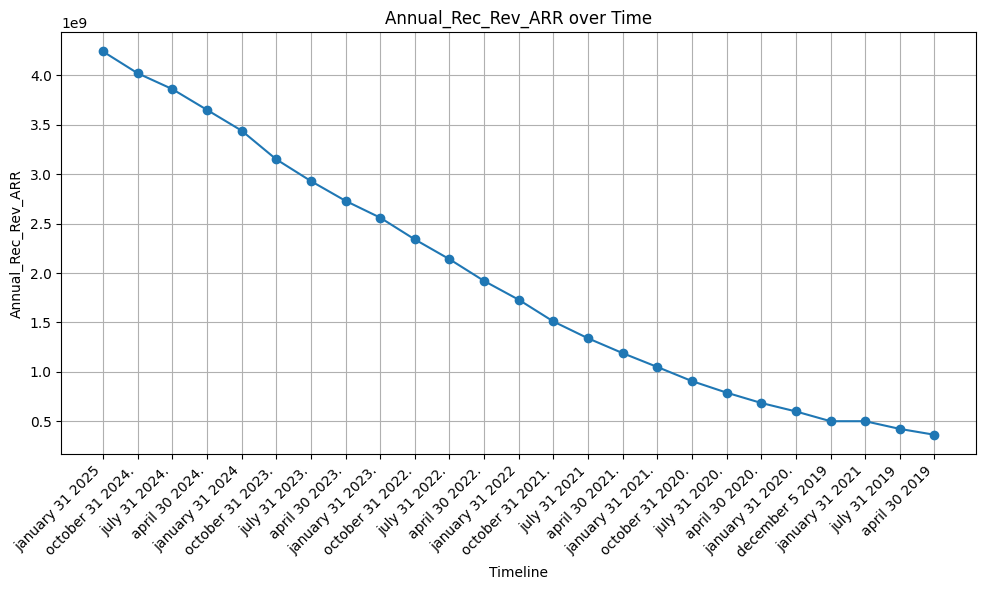

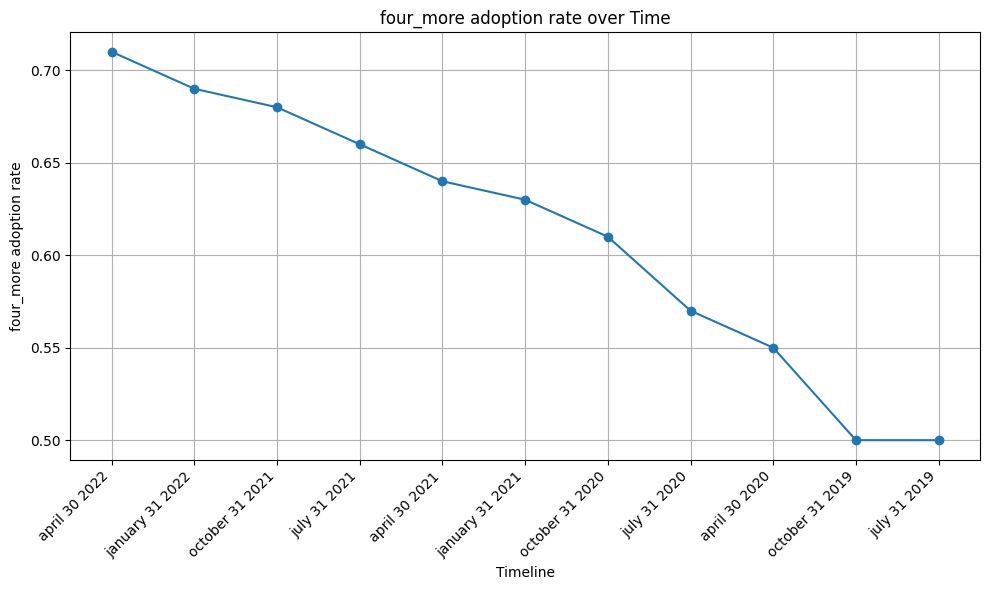

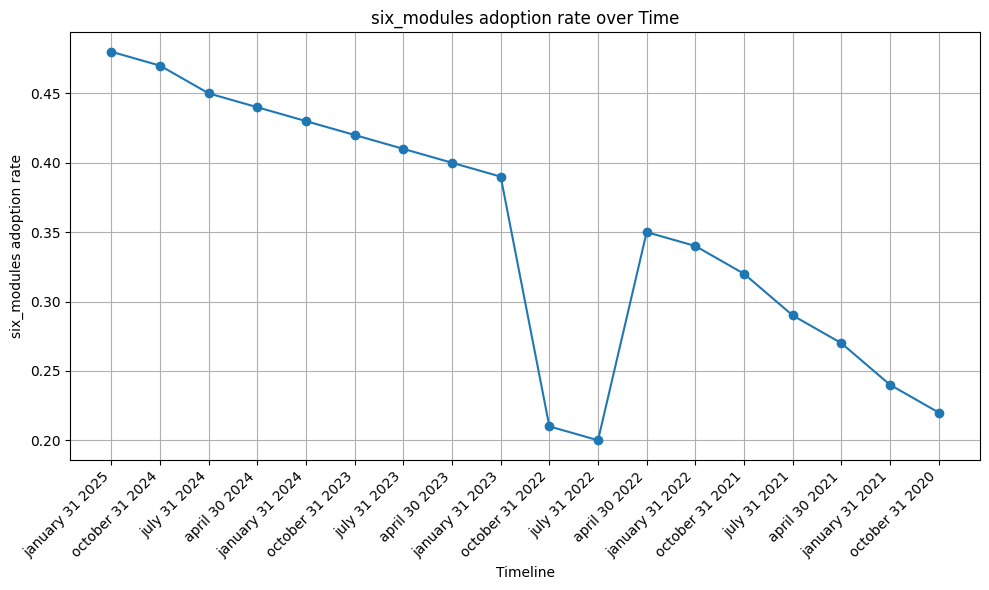

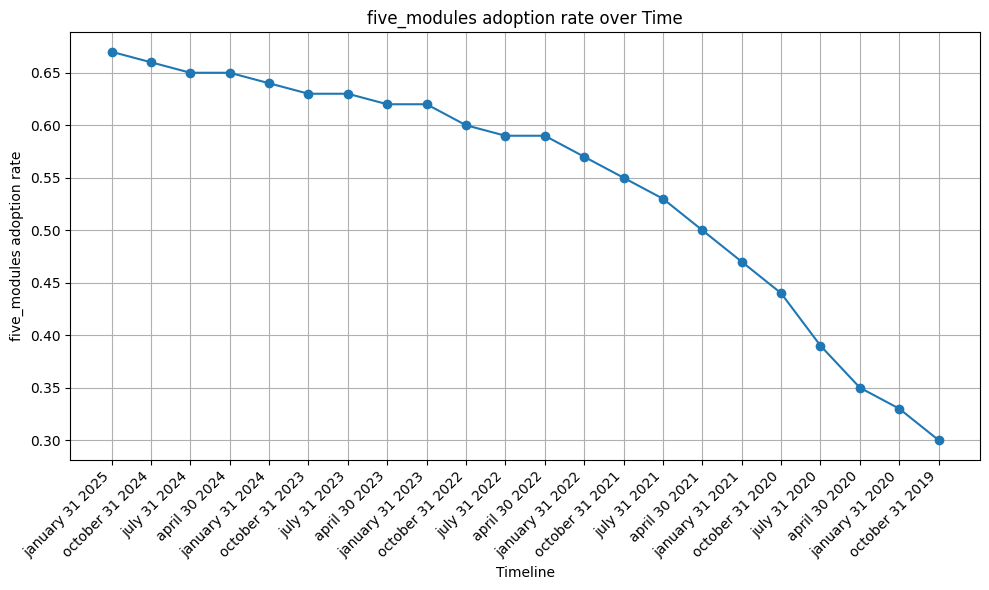

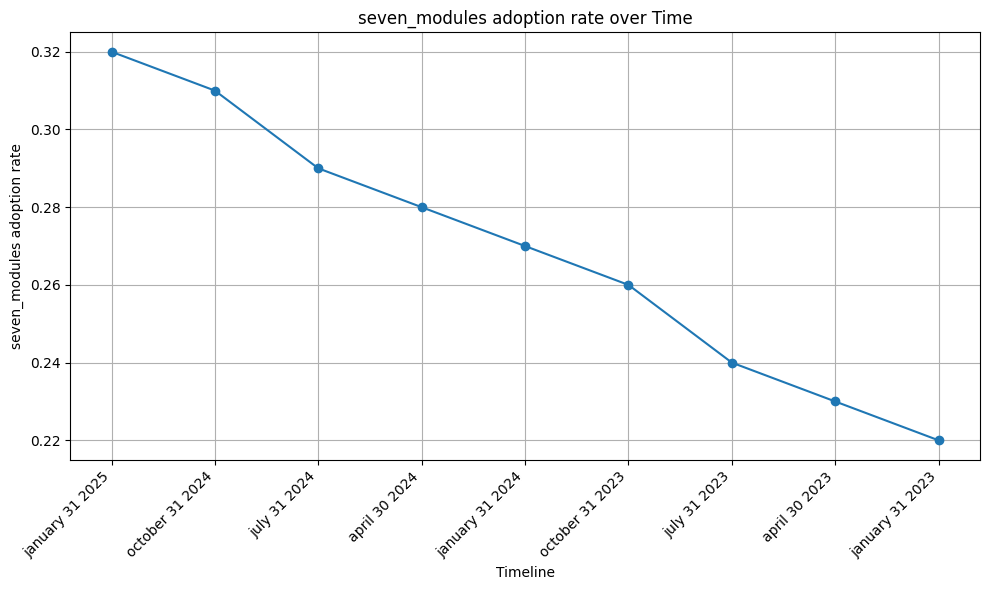

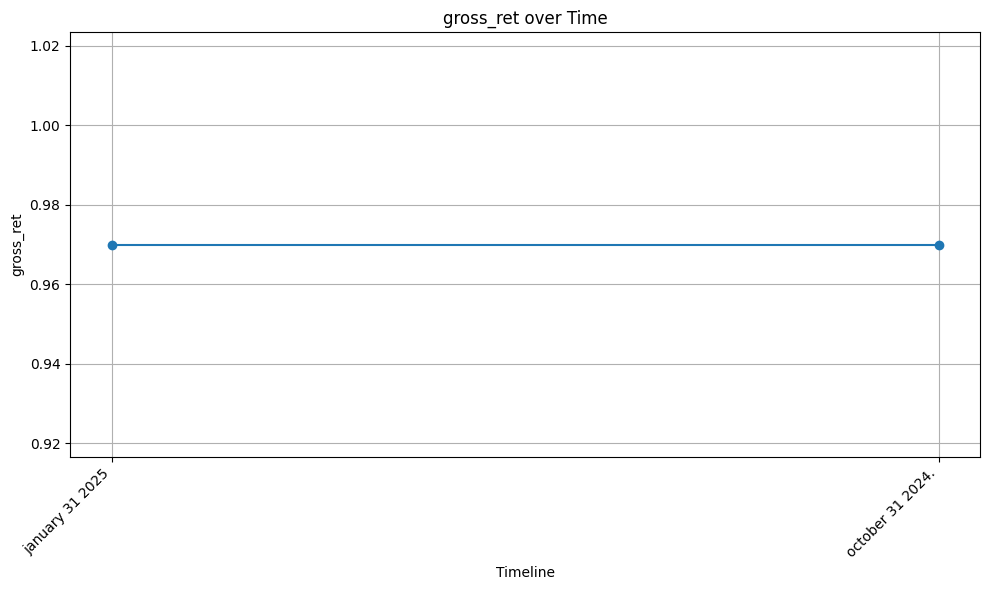

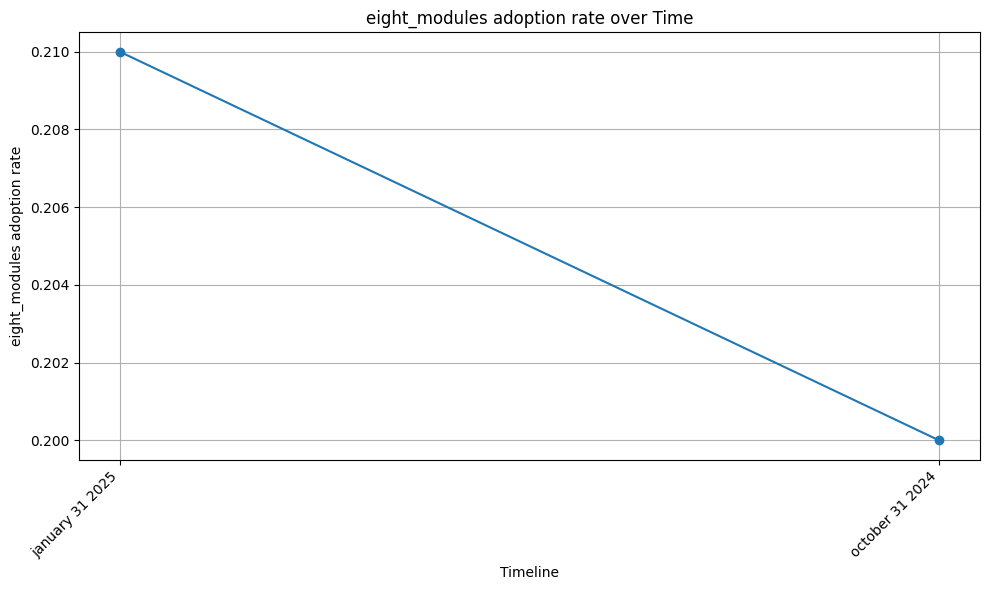

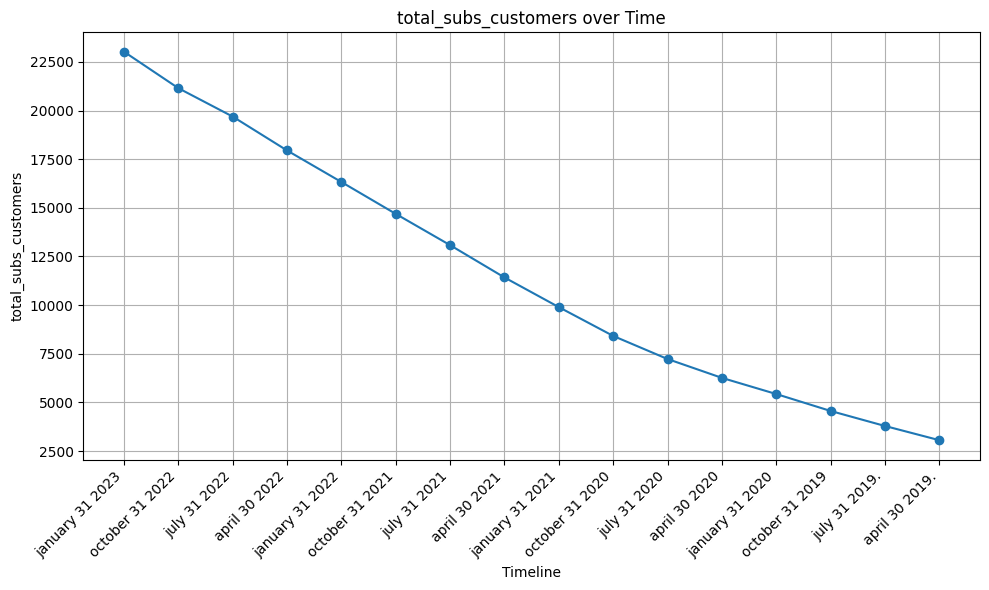

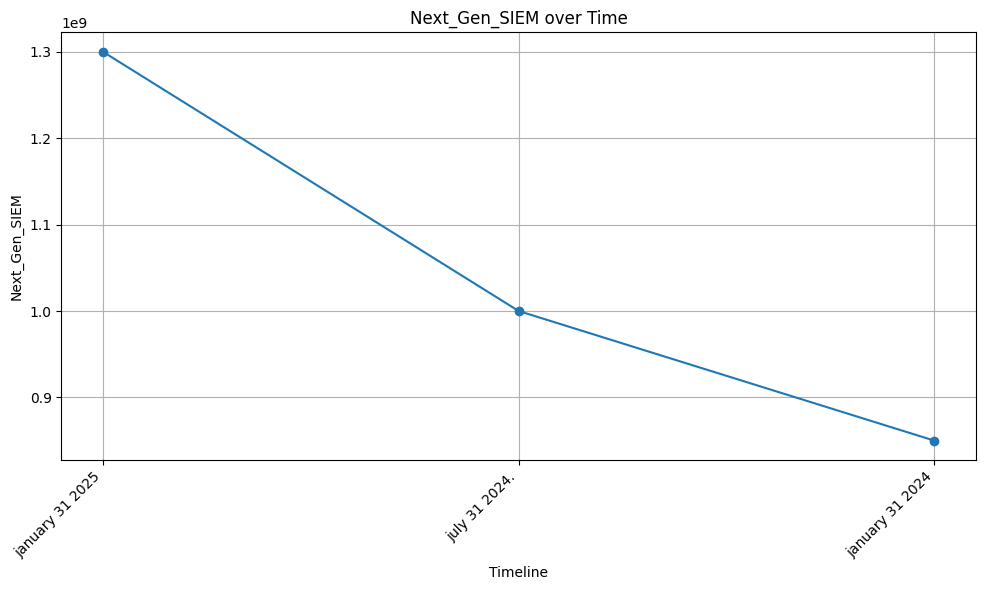

In [11]:

import matplotlib.pyplot as plt

def create_graphs(cleaned_data):
  """
  Creates graphs based on the cleaned_data.
  """
  for key in set().union(*[d.keys() for d in cleaned_data if 'Timeline' in d]):
    if key != 'Timeline':
      timelines = []
      values = []

      for d in cleaned_data:
        if 'Timeline' in d and key in d:
          timelines.append(d['Timeline'])
          values.append(d[key])

      if timelines and values:  # Check if there's data to plot
        plt.figure(figsize=(10, 6))
        plt.plot(timelines, values, marker='o', linestyle='-')
        plt.xlabel("Timeline")
        plt.ylabel(key)  # Use the key as the y-axis label
        plt.title(f"{key} over Time")
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
        plt.tight_layout()
        plt.show()

# Assuming cleaned_data is defined as in the provided code
create_graphs(cleaned_data)
